# Exercises:
##### Exercise 3.1: "Pi calculation using Monte Carlo method"
* Implement the calculation of the irrational number Pi using the Monte Carlo method
* Use Python multiprocessing to gain access to multiple processes
* Show the result for increasing number of random realizations
* Measure the execution time and observe the speedup when increasing the number of processors

In [11]:
# Importing libraries
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from typing import Union
import numpy as np
from numba import jit
import timeit
import time

# Monte Carlo Method Implementation
def monte_carlo(n):
    points_inside_circle = 0
    points_generated = 0
    inside = []
    outside = []
    pi = []
    
    for i in range(n):
        point = generate_points()
        
        check = in_circle(point)
        if check == True:
            inside.append(point)
            points_inside_circle += 1
        else:
            outside.append(point)
        
        points_generated += 1
        
        pi_est = 4 * (points_inside_circle / points_generated)
        pi.append(pi_est)
        
    return np.array(inside), np.array(outside), np.array(pi)

# Monte Carlo Method Jit Implementation
@jit(nopython=True, fastmath=True, cache=True)
def monte_carlo_jit(n):
    points_inside_circle = 0
    points_generated = 0  
    inside = []
    outside = []
      
    for i in range(n):
        point = (np.random.rand(), np.random.rand())
        
        d = np.sqrt(point[0]**2 + point[1]**2)
        if d <= 1:
            points_inside_circle += 1
            inside.append(point)
        else:
            outside.append(point)
        
        points_generated += 1
        pi_est = 4 * (points_inside_circle / points_generated)
        
    return np.array(inside), np.array(outside)
        
# Generate points
def generate_points():
    return (np.random.rand(), np.random.rand())

def in_circle(point):
    d = np.sqrt(point[0]**2 + point[1]**2)
    return d <= 1

In [12]:
## Generate points
#np.random.seed(10)
#points = generate_points(10)

## Check if points are inside circle
#in_c = in_circle(points)
#inside_c = points[in_c]
#not_inside_c = points[~in_c]

#print("Points inside the unit circle:\n", inside_c)
#print("Points outside the unit circle:\n", not_inside_c)

## Generate angles from 0 to 2*pi
#angles = np.linspace(0, 2 * np.pi, 100)

## Generate x and y coordinates of points on the unit circle
#x = np.cos(angles)
#y = np.sin(angles)

## Plot the unit circle
##plt.figure(figsize=(6,6))
#plt.plot(x, y, color="black")
#plt.scatter(inside_c[:,0], inside_c[:,1], color="red")
#plt.scatter(not_inside_c[:,0], not_inside_c[:,1], color="blue")
#plt.title('Monte Carlo Method')
#plt.xlim(0, 1)  # Limit x-axis
#plt.ylim(0, 1)  # Limit y-axis
#plt.xlabel('x')
#plt.ylabel('y')
#plt.show()

time: 4.355377197265625


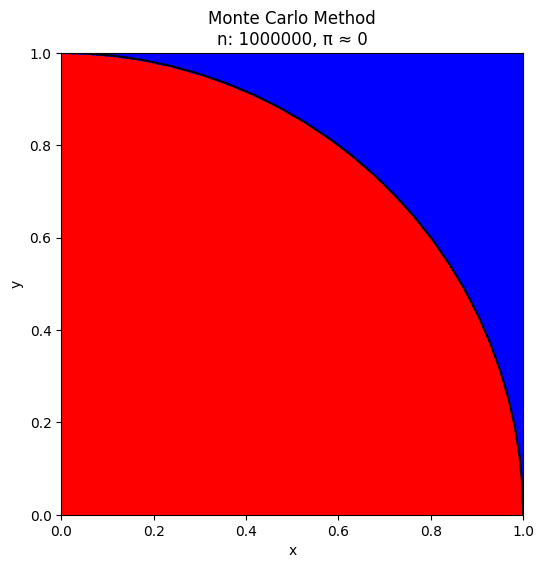

In [13]:
# Set random seed
np.random.seed(10)

# Initialize variables
n = 1000000

# Generate angles from 0 to 2*pi
angles = np.linspace(0, 2 * np.pi, 100)

# Generate x and y coordinates of points on the unit circle
x = np.cos(angles)
y = np.sin(angles)

# Plot the unit circle
plt.figure(figsize=(6,6))
plt.plot(x, y, color="black")
plt.xlim(0, 1)  # Limit x-axis
plt.ylim(0, 1)  # Limit y-axis
plt.gca().set_aspect('equal', 'box')
plt.xlabel('x')
plt.ylabel('y')

t1 = time.time()
inside, outside, _ = monte_carlo(n)
print("time:", time.time()-t1)

plt.scatter(inside[:,0], inside[:,1], color="red", marker=".", s=0.5)
plt.scatter(outside[:,0], outside[:,1], color="blue", marker=".", s=0.5)
    
plt.title(f'Monte Carlo Method\nn: {n}, π ≈ {0}')
plt.show()

time jit: 0.07043099403381348


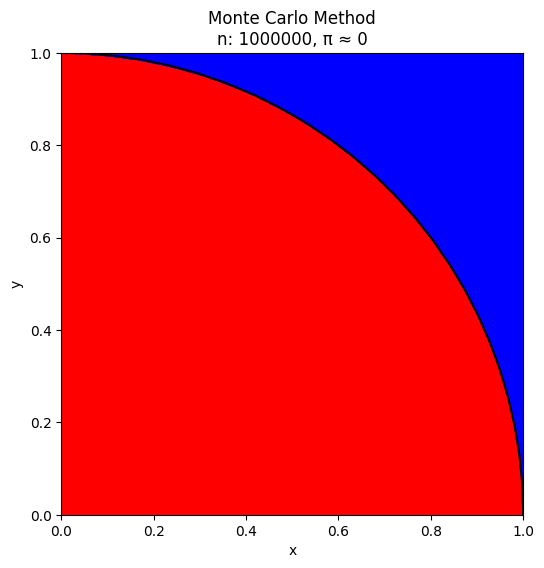

In [14]:
# Set random seed
np.random.seed(10)

# Initialize variables
n = 1000000

# Generate angles from 0 to 2*pi
angles = np.linspace(0, 2 * np.pi, 100)

# Generate x and y coordinates of points on the unit circle
x = np.cos(angles)
y = np.sin(angles)

# Plot the unit circle
plt.figure(figsize=(6,6))
plt.plot(x, y, color="black")
plt.xlim(0, 1)  # Limit x-axis
plt.ylim(0, 1)  # Limit y-axis
plt.gca().set_aspect('equal', 'box')
plt.xlabel('x')
plt.ylabel('y')

t1 = time.time()
inside, outside = monte_carlo_jit(n)
print("time jit:", time.time()-t1)

plt.scatter(inside[:,0], inside[:,1], color="red", marker=".", s=0.5)
plt.scatter(outside[:,0], outside[:,1], color="blue", marker=".", s=0.5)
    
plt.title(f'Monte Carlo Method\nn: {n}, π ≈ {0}')
plt.show()